# Секция 3. Визуализация данных

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('new_features.csv')

In [8]:
df.head()

,date,airline,dep_time,from,stop,to,price,is_econom,taken_time_minues,from_coordinates_lat,from_coordinates_lon,to_coordinates_lat,to_coordinates_lon,distance,speed,week_day,dep_minutes,stop_count,new_airlines
0,2022-11-02,Air India,18:00,Delhi,non-stop,Mumbai,25612,0,120.0,28.66667,77.21667,18.96667,72.83333,1166.798334,583.399167,2,1080,0,Air India
1,2022-11-02,Air India,19:00,Delhi,non-stop,Mumbai,25612,0,135.0,28.66667,77.21667,18.96667,72.83333,1166.798334,518.577037,2,1140,0,Air India
2,2022-11-02,Air India,20:00,Delhi,1-stop,Mumbai,42220,0,1485.0,28.66667,77.21667,18.96667,72.83333,1166.798334,47.143367,2,1200,1,Air India
3,2022-11-02,Air India,21:25,Delhi,1-stop,Mumbai,44450,0,1590.0,28.66667,77.21667,18.96667,72.83333,1166.798334,44.030126,2,1285,1,Air India
4,2022-11-02,Air India,17:15,Delhi,1-stop,Mumbai,46690,0,400.0,28.66667,77.21667,18.96667,72.83333,1166.798334,175.019750,2,1035,1,Air India


### Поиск выбросов

Функции распределения -> смотрим на края

<AxesSubplot:xlabel='price', ylabel='Count'>

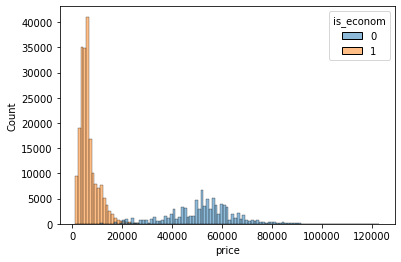

In [46]:
sns.histplot(data=df, x='price', hue='is_econom')

<AxesSubplot:xlabel='speed', ylabel='Count'>

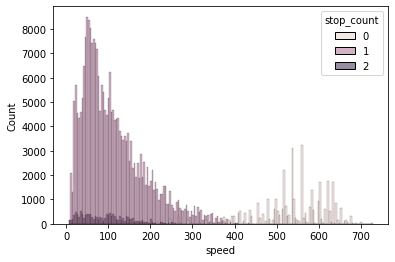

In [48]:
sns.histplot(data=df, x='speed', hue='stop_count')

Выше 800 км/ч мало полетов, а также средний пассажирский самолет развивает скорость до 800 км/ч. Уберем строки, у которых скорость выше 800.

In [33]:
df = df[df['speed'] <= 800]

<AxesSubplot:xlabel='taken_time_minues', ylabel='Count'>

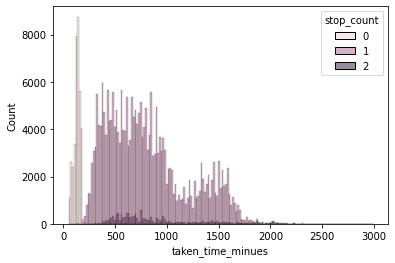

In [38]:
sns.histplot(data=df, x='taken_time_minues', hue='stop_count')

### Зависимость цены от скорости

Вещественное:
histplot, scatterplot

In [54]:
df['type_of_fly'] = df['stop_count'].astype('str') + df['is_econom'].astype('str')

/var/folders/yb/ysqh2wxs6v1_4q_92fnn6q380000gn/T/ipykernel_27269/887075046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_fly'] = df['stop_count'].astype('str') + df['is_econom'].astype('str')


<AxesSubplot:xlabel='speed', ylabel='price'>

/Users/michil/.virtualenvs/base/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


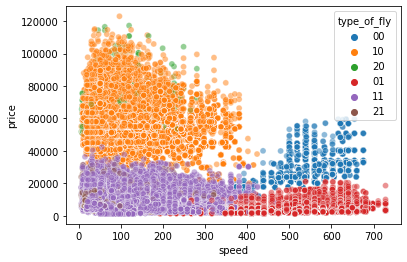

In [55]:
sns.scatterplot(
    data=df, 
    x='speed', 
    y='price',
    hue='type_of_fly',
    alpha=0.5
)

<AxesSubplot:xlabel='speed', ylabel='price'>

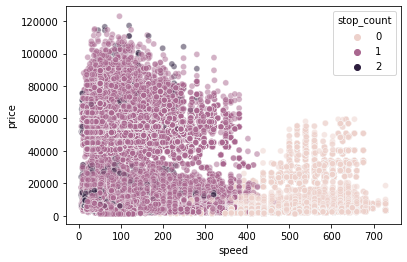

In [35]:
sns.scatterplot(
    data=df, 
    x='speed', 
    y='price',
    hue='stop_count',
    alpha=0.5
)

Вроде бы зависимости нет. Но стоит учитывать, что есть пересадки.

### Зависимость цены от количества пересадок

Категориальных: barplot, scatterplot

Если распределение нормальное: boxplot

<AxesSubplot:xlabel='stop_count', ylabel='price'>

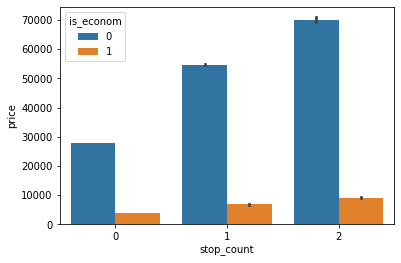

In [57]:
sns.barplot(data=df, x='stop_count', y='price', hue='is_econom')

Чем больше количество пересадок - тем больше цена. Наверное потому что лететь дальше.